# Project: Wrangling and Analyzing WeRateDogs Twitter Archive

In [1]:
# import libraries

import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archives = pd.read_csv("twitter-archive-enhanced.csv")
archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predictions_url)

filename = 'image_predictions.tsv'
if not os.path.exists(filename):
    with open(filename, mode = 'wb') as file:
        file.write(response.content)
        
predictions = pd.read_csv(filename, sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []

with open("tweet-json.txt", encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        tweet_id = json_obj["id"]
        retweet_count = json_obj["retweet_count"]
        favorite_count = json_obj["favorite_count"]
        # Append to list of dictionaries
        df_list.append({'tweet_id': str(tweet_id),
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
        
counts = pd.DataFrame(df_list)
counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, I detected and document quality and tidiness issues using both visual assessment and programmatic assessement.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
# Visual Assessment
archives.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
814,771014301343748096,NaN,NaN,2016-08-31 15:58:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771014301...,7,10,None,None,None,None,None
2291,667165590075940865,NaN,NaN,2015-11-19 02:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. AKA Fetty Woof. Lost eye savi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667165590...,10,10,Churlie,None,None,None,None
1538,689835978131935233,NaN,NaN,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689835978...,11,10,Fynn,None,None,None,None
1628,684588130326986752,NaN,NaN,2016-01-06 04:11:43 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper just got his first kiss. 12/10 he'...,NaN,NaN,NaN,https://vine.co/v/ihWIxntjtO7,12,10,None,None,None,pupper,None
2135,670061506722140161,NaN,NaN,2015-11-27 02:08:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Liam. He has a particular set of skill...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670061506...,11,10,Liam,None,None,None,None


In [6]:
#inspect archives dataframe
archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
# view summary statistics
archives.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
# check for retweets
archives[(archives['retweeted_status_id'].notnull()) & (archives['retweeted_status_user_id'].notnull()) & (archives['retweeted_status_timestamp'].notnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [9]:
# another check for retweet (texts with RT at the start)
# the resulting dataframe is 2 records more than previous. The inspection in the next cell explains why
archives[archives["text"].str.match('rt', case=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [10]:
# indexes 1286 and 1860 with null retweeted_status_id values
# these two aren't retweets even though they begin with RT
view = archives[archives["text"].str.match('rt', case=False)].loc[[1286,1860]]
list(view['text'])

['RT if you are as ready for summer as this pup is 12/10 https://t.co/xdNNEZdGJY',
 'RT until we find this dog. Clearly a cool dog (front leg relaxed out window). Looks to be a superb driver. 10/10 https://t.co/MnTrKaQ8Wn']

In [11]:
archives[(archives['in_reply_to_user_id'].notnull()) & (archives['in_reply_to_status_id'].notnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [12]:
archives[archives['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [13]:
list(archives[archives['rating_denominator'] > 10]['text'])

['@docmisterio account started on 11/15/15',
 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
 "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
 "Here's a brigade of puppers. All look very prepared for whate

In [14]:
archives[archives['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [15]:
list(archives[archives['rating_denominator'] < 10]['text'])

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [16]:
archives[archives['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [17]:
a = list(archives[archives['rating_numerator'] < 10]['rating_numerator'])

In [18]:
b = list(archives[archives['rating_numerator'] < 10]['text'])

In [19]:
list(zip(a, b))

[(5,
  'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'),
 (6,
  "This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1"),
 (0,
  "When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"),
 (7, "I was going to do 007/10, but the joke wasn't worth the &lt;10 rating"),
 (7,
  "RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…"),
 (9,
  "RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…"),
 (8,
  'RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…'),
 (1,
  "RT @do

In [20]:
archives[archives['name'] == 'None'][['name', 'text']]

,name,text
5,None,Here we have a majestic great white breaching ...
7,None,When you watch your owner call another dog a g...
12,None,Here's a puppo that seems to be on the fence a...
24,None,You may not have known you needed to see this ...
25,None,This... is a Jubilant Antarctic House Bear. We...
...,...,...
2342,None,Here we have a well-established sunblockerspan...
2343,None,Let's hope this flight isn't Malaysian (lol). ...
2344,None,Here we have a northern speckled Rhododendron....
2351,None,Here we have a 1949 1st generation vulpix. Enj...


In [21]:
archives[archives.apply(lambda x: x['name'] in x['text'], axis=1)][['name', 'text']]

,name,text
0,Phineas,This is Phineas. He's a mystical boy. Only eve...
1,Tilly,This is Tilly. She's just checking pup on you....
2,Archie,This is Archie. He is a rare Norwegian Pouncin...
3,Darla,This is Darla. She commenced a snooze mid meal...
4,Franklin,This is Franklin. He would like you to stop ca...
...,...,...
2349,an,This is an odd dog. Hard on the outside but lo...
2350,a,This is a truly beautiful English Wilson Staff...
2352,a,This is a purebred Piers Morgan. Loves to Netf...
2353,a,Here is a very happy pup. Big fan of well-main...


In [22]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
830,693629975228977152,https://pbs.twimg.com/media/CaBEx3SWEAILZpi.jpg,1,pug,0.841987,True,French_bulldog,0.069791,True,Boston_bull,0.038720,True
1236,746726898085036033,https://pbs.twimg.com/media/ClzoJz7WYAELHSf.jpg,1,golden_retriever,0.256505,True,Labrador_retriever,0.252417,True,seat_belt,0.203163,False
357,672609152938721280,https://pbs.twimg.com/media/CVWWdKLWEAEnSk7.jpg,1,microwave,0.981946,False,rotisserie,0.007472,False,television,0.005881,False
877,698342080612007937,https://pbs.twimg.com/ext_tw_video_thumb/69834...,1,boxer,0.883048,True,Saint_Bernard,0.030579,True,Staffordshire_bullterrier,0.012994,True
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True


In [25]:
predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [26]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [27]:
#check if there are duplicate records
print(sum(archives.duplicated()))
print(sum(predictions.duplicated()))
print(sum(counts.duplicated()))

0
0
0


In [28]:
archives.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [29]:
archives.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [30]:
archives.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [31]:
archives.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Quality issues

1. Incorrect datatypes in archives table: timestamps should be datetime, IDs (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) should be strings not numeric values since no calculations will be performed on them.


2. Some records in the archives table are retweets. Text begins with "RT" and they have values in the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns


3. Some tweets in the archives table are replies. These tweets have values in the in_reply_to_status_id and in_reply_to_user_id


4. Ratings with denominators greater than 10. Some are incorrect (9/11 should be 14/10), (4/20 = 13/10), (50/50 = 11/10), (7/11 = 10/10) - (archives table).


5. Ratings with denominators less than 10: ratings (960/0 and 1/2) should be (13/10 and 9/10). Record with 24/7 actually has no rating (archives table).


6. Numerator 13.5 entered as 5 in archives table(index 45).


7. Nulls represented as string 'None' instead of nan values for dog without names in the archives table and incorrect dog names (e.g. a, an) in archives table.


8. Incorrect datatypes for tweet_id and img_num in predictions table.


### Tidiness issues
1. Drop columns not needed from the archives table.

2. Get the tweet_id from the predictions table and pick out data for the most confident prediction into three columns (1 prediction, 1 confidence score and 1 if_dog columns).

3. Drop rows where prediction is not dog in the predictions table and merge with the archives table to get tweets for dog_ratings with images.

3. The archives table should be merged with the counts table and uneccessary columns dropped.

## Cleaning Data
In this section, I clean all of the issues documented while assessing.

In [32]:
# Make copies of original pieces of data
archives_clean = archives.copy()
predictions_clean = predictions.copy()
counts_clean = counts.copy()

### Quality Issue #1: 
 > Incorrect datatypes in archives table: timestamps should be datetime, IDs (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) should be strings not numeric values since no calculations will be performed on them.

#### Define:
Convert timestamps to datetime datatype and IDs (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) to object.

#### Code

In [33]:
# To datetimes
archives_clean['timestamp'] = pd.to_datetime(archives_clean['timestamp'])
archives_clean['retweeted_status_timestamp'] = pd.to_datetime(archives_clean['retweeted_status_timestamp'])

# To objects
archives_clean['tweet_id'] = archives_clean['tweet_id'].astype(object)
archives_clean['in_reply_to_status_id'] = archives_clean['in_reply_to_status_id'].astype(object)
archives_clean['in_reply_to_user_id'] = archives_clean['in_reply_to_user_id'].astype(object)
archives_clean['retweeted_status_id'] = archives_clean['retweeted_status_id'].astype(object)
archives_clean['retweeted_status_user_id'] = archives_clean['retweeted_status_user_id'].astype(object)

#### Test

In [34]:
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Quality Issue #2:
> Some records in the archives table are retweets. Text begins with "RT" and they have values in the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns

#### Define
Subset dataframe to exclude records containing retweets:

#### Code

In [35]:
archives_clean = archives_clean[archives_clean['retweeted_status_id'].isnull()]

#### Test

In [36]:
# should be an empty dataframe
archives_clean[(archives_clean['retweeted_status_id'].notnull()) \
               & (archives_clean['retweeted_status_user_id'].notnull()) \
               & (archives_clean['retweeted_status_timestamp'].notnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
# drop these columns since they are no longer needed
archives_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

### Quality Issue #3: 
 > Some tweets in the archives table are replies. These tweets have values in the in_reply_to_status_id and in_reply_to_user_id

#### Define
Subset dataframe to exclude records containing replies:

#### Code

In [38]:
archives_clean = archives_clean[archives_clean['in_reply_to_status_id'].isnull()]

#### Test

In [39]:
# should be an empty data frame
archives_clean[(archives_clean['in_reply_to_user_id'].notnull()) \
               & (archives_clean['in_reply_to_status_id'].notnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [40]:
# drop these columns since they are no longer needed
archives_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

### Quality Issue #4:
> Ratings with denominators greater than 10. Some are incorrect (9/11 should be 14/10), (4/20 should be 13/10), (50/50 should be 11/10), (7/11 should be 10/10) - (archives table).

#### Define
Input correct data for instances where it is available. Drop remaining rows with denominator greater than 10.

#### Code

In [41]:
# to get indexes of coloumns to change
archives_clean[archives_clean['rating_denominator'] > 10][['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
433,84,70
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50
1228,99,90
1254,80,80
1274,45,50
1351,60,50


In [42]:
# indexes to change

# 1068 - 9/11 (change to 14/10)
# 1165 - 4/20 (change to 13/10)
# 1202 - 50/50 (change to 11/10)
# 1662 - 7/11 (change to 10/10)

archives_clean.loc[[1068, 1165, 1202, 1662], 'rating_numerator'] = [14, 13, 11, 10]
archives_clean.loc[[1068, 1165, 1202, 1662], 'rating_denominator'] = 10

In [43]:
# drop remaining columns with denominator greater than 10
index_values = archives_clean[archives_clean['rating_denominator'] > 10].index
print(index_values)
archives_clean.drop(index=index_values, inplace=True)

Int64Index([433, 902, 1120, 1228, 1254, 1274, 1351, 1433, 1635, 1779, 1843], dtype='int64')


#### Test

In [44]:
archives_clean.loc[[1068, 1165, 1202, 1662], ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1068,14,10
1165,13,10
1202,11,10
1662,10,10


In [45]:
# should be an empty dataframe
archives_clean[archives_clean['rating_denominator'] > 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #5:
> Ratings with denominators less than 10: ratings (960/0 and 1/2) should be (13/10 and 9/10). Record with 24/7 actually has no rating (archives table).

#### Define
Input correct data for instances where it is available. Drop remaining rows with denominator less than 10.

#### Code

In [46]:
# to get indexes of coloumns to change and drop (the column with 960/0 rating was a reply tweet and has already been dropped)
archives_clean[archives_clean['rating_denominator'] < 10][['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
516,24,7
2335,1,2


In [47]:
# change values
archives_clean.loc[2335, 'rating_numerator'] = 9
archives_clean.loc[2335, 'rating_denominator'] = 10

In [48]:
# drop row
archives_clean.drop(index=516, inplace=True)

#### Test

In [49]:
archives_clean.loc[[2335], ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
2335,9,10


In [50]:
# should be an empty dataframe
archives_clean[archives_clean['rating_denominator'] < 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #6:
> Numerator 13.5 entered as 5 in archives table (index 45).

#### Define
Change datatype of numerator to float to accomodate this value. Change 5 to 13.5

#### Code

In [51]:
archives_clean['rating_numerator'] = archives_clean['rating_numerator'].astype(float)
archives_clean.loc[45, 'rating_numerator'] = 13.5

#### Test

In [52]:
archives_clean['rating_numerator'].dtype

dtype('float64')

In [53]:
archives_clean.loc[[45], ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
45,13.5,10


### Quality Issue #7:
> Nulls represented as string 'None' instead of nan values for dog without names in the archives table and incorrect dog names (e.g. a, an) in archives table.

#### Define
Drop the name column. It is not needed for analysis

#### Code

In [54]:
archives_clean.drop(columns='name', inplace=True)

#### Test

In [55]:
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2085 non-null   object             
 1   timestamp           2085 non-null   datetime64[ns, UTC]
 2   source              2085 non-null   object             
 3   text                2085 non-null   object             
 4   expanded_urls       2082 non-null   object             
 5   rating_numerator    2085 non-null   float64            
 6   rating_denominator  2085 non-null   int64              
 7   doggo               2085 non-null   object             
 8   floofer             2085 non-null   object             
 9   pupper              2085 non-null   object             
 10  puppo               2085 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(8)
memory usage: 260.0+ KB


### Quality Issue #8:
> Incorrect datatypes for tweet_id and img_num in predictions table.

#### Define
Change the datatype of tweet_id to object and that of img_num to category

#### Code

In [56]:
predictions_clean['tweet_id'] = predictions_clean['tweet_id'].astype(object)
predictions_clean['img_num'] = predictions_clean['img_num'].astype('category')

#### Test

In [57]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2075 non-null   object  
 1   jpg_url   2075 non-null   object  
 2   img_num   2075 non-null   category
 3   p1        2075 non-null   object  
 4   p1_conf   2075 non-null   float64 
 5   p1_dog    2075 non-null   bool    
 6   p2        2075 non-null   object  
 7   p2_conf   2075 non-null   float64 
 8   p2_dog    2075 non-null   bool    
 9   p3        2075 non-null   object  
 10  p3_conf   2075 non-null   float64 
 11  p3_dog    2075 non-null   bool    
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 138.1+ KB


### Tidiness Issue #1:
> One variable is 3 columns (dog stages in the archives table should be one column).

#### Define
Drop columns not needed from the archives table (source, text, expanded_urls, doggo, floofer, pupper and, puppo)

In [58]:
archives_clean.drop(columns=['source', 'text', 'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [59]:
archives_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56+00:00,13.0,10
1,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10
2,891815181378084864,2017-07-31 00:18:03+00:00,12.0,10
3,891689557279858688,2017-07-30 15:58:51+00:00,13.0,10
4,891327558926688256,2017-07-29 16:00:24+00:00,12.0,10


### Tidiness Issue #2:
> Get the tweet_id from the predictions table and pick out data of its most confident prediction into three columns (1 prediction, 1 confidence score and 1 if_dog columns).

#### Define
Drop columns not needed from the predictions table and write code to get only data of the most confident prediction.

#### Code

In [60]:
# drop columns not needed
predictions_clean.drop(columns=['jpg_url', 'img_num'], inplace=True)

In [61]:
predictions_clean.head()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [62]:
# create 3 new columns containing results for each column represented in a list
predictions_clean['first_pred'] = predictions_clean.apply(lambda x: [x['p1'], x['p1_conf'], x['p1_dog']], axis=1)
predictions_clean['second_pred'] = predictions_clean.apply(lambda x: [x['p2'], x['p2_conf'], x['p2_dog']], axis=1)
predictions_clean['third_pred'] = predictions_clean.apply(lambda x: [x['p3'], x['p3_conf'], x['p3_dog']], axis=1)

In [63]:
# identify most confident prediction
predictions_clean['most_confident'] = predictions_clean.apply(lambda x: max(x['p1_conf'], x['p2_conf'], x['p3_conf']), axis=1)

In [64]:
predictions_clean.sample(5)

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,first_pred,second_pred,third_pred,most_confident
1625,803773340896923648,miniature_pinscher,0.817066,True,redbone,0.059707,True,Irish_terrier,0.034195,True,"[miniature_pinscher, 0.817066, True]","[redbone, 0.0597065, True]","[Irish_terrier, 0.0341952, True]",0.817066
1952,863553081350529029,Eskimo_dog,0.413330,True,malamute,0.347646,True,Siberian_husky,0.149536,True,"[Eskimo_dog, 0.41333, True]","[malamute, 0.347646, True]","[Siberian_husky, 0.149536, True]",0.413330
1039,712085617388212225,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True,"[Shih-Tzu, 0.625129, True]","[Tibetan_terrier, 0.126897, True]","[Lhasa, 0.119663, True]",0.625129
1447,776088319444877312,web_site,0.999916,False,pug,0.000077,True,menu,0.000002,False,"[web_site, 0.999916, False]","[pug, 7.657020000000001e-05, True]","[menu, 2.16468e-06, False]",0.999916
1104,722613351520608256,Labrador_retriever,0.530915,True,golden_retriever,0.288230,True,chow,0.044854,True,"[Labrador_retriever, 0.5309149999999999, True]","[golden_retriever, 0.28823, True]","[chow, 0.0448536999999999, True]",0.530915


In [65]:
# drop p1, p2, p3 columns, the same info is reprensented in first_pred, second_pred and third_pred
predictions_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

In [66]:
predictions_clean.head()

,tweet_id,first_pred,second_pred,third_pred,most_confident
0,666020888022790149,"[Welsh_springer_spaniel, 0.465074, True]","[collie, 0.156665, True]","[Shetland_sheepdog, 0.0614285, True]",0.465074
1,666029285002620928,"[redbone, 0.506826, True]","[miniature_pinscher, 0.0741916999999999, True]","[Rhodesian_ridgeback, 0.07201, True]",0.506826
2,666033412701032449,"[German_shepherd, 0.596461, True]","[malinois, 0.1385839999999999, True]","[bloodhound, 0.116197, True]",0.596461
3,666044226329800704,"[Rhodesian_ridgeback, 0.408143, True]","[redbone, 0.360687, True]","[miniature_pinscher, 0.222752, True]",0.408143
4,666049248165822465,"[miniature_pinscher, 0.560311, True]","[Rottweiler, 0.243682, True]","[Doberman, 0.154629, True]",0.560311


In [67]:
# melt the first_pred, second_pred and third_pred columns to a pred_num and pred_result column
predictions_clean = predictions_clean.melt(id_vars=['tweet_id', 'most_confident'],
                               value_vars=['first_pred', 'second_pred', 'third_pred'],
                               var_name='pred_num', value_name='pred_result')
predictions_clean

,tweet_id,most_confident,pred_num,pred_result
0,666020888022790149,0.465074,first_pred,"[Welsh_springer_spaniel, 0.465074, True]"
1,666029285002620928,0.506826,first_pred,"[redbone, 0.506826, True]"
2,666033412701032449,0.596461,first_pred,"[German_shepherd, 0.596461, True]"
3,666044226329800704,0.408143,first_pred,"[Rhodesian_ridgeback, 0.408143, True]"
4,666049248165822465,0.560311,first_pred,"[miniature_pinscher, 0.560311, True]"
...,...,...,...,...
6220,891327558926688256,0.555712,third_pred,"[German_short-haired_pointer, 0.175219, True]"
6221,891689557279858688,0.170278,third_pred,"[spatula, 0.0408359, False]"
6222,891815181378084864,0.716012,third_pred,"[kelpie, 0.0313789, True]"
6223,892177421306343426,0.323581,third_pred,"[papillon, 0.0689569, True]"


In [68]:
# subset to get pred_result that corresponds to most_confident prediction
predictions_clean = predictions_clean[predictions_clean.apply(lambda x: x['most_confident'] in x['pred_result'], axis=1)]
predictions_clean

,tweet_id,most_confident,pred_num,pred_result
0,666020888022790149,0.465074,first_pred,"[Welsh_springer_spaniel, 0.465074, True]"
1,666029285002620928,0.506826,first_pred,"[redbone, 0.506826, True]"
2,666033412701032449,0.596461,first_pred,"[German_shepherd, 0.596461, True]"
3,666044226329800704,0.408143,first_pred,"[Rhodesian_ridgeback, 0.408143, True]"
4,666049248165822465,0.560311,first_pred,"[miniature_pinscher, 0.560311, True]"
...,...,...,...,...
2070,891327558926688256,0.555712,first_pred,"[basset, 0.555712, True]"
2071,891689557279858688,0.170278,first_pred,"[paper_towel, 0.1702779999999999, False]"
2072,891815181378084864,0.716012,first_pred,"[Chihuahua, 0.716012, True]"
2073,892177421306343426,0.323581,first_pred,"[Chihuahua, 0.323581, True]"


In [69]:
# new dataframe from pred_result
split_result = pd.DataFrame(predictions_clean['pred_result'].tolist(), columns=['prediction', 'pred_conf', 'is_dog'])

# concat split_result to predictions table
predictions_clean = pd.concat([predictions_clean, split_result], axis=1)
predictions_clean

,tweet_id,most_confident,pred_num,pred_result,prediction,pred_conf,is_dog
0,666020888022790149,0.465074,first_pred,"[Welsh_springer_spaniel, 0.465074, True]",Welsh_springer_spaniel,0.465074,True
1,666029285002620928,0.506826,first_pred,"[redbone, 0.506826, True]",redbone,0.506826,True
2,666033412701032449,0.596461,first_pred,"[German_shepherd, 0.596461, True]",German_shepherd,0.596461,True
3,666044226329800704,0.408143,first_pred,"[Rhodesian_ridgeback, 0.408143, True]",Rhodesian_ridgeback,0.408143,True
4,666049248165822465,0.560311,first_pred,"[miniature_pinscher, 0.560311, True]",miniature_pinscher,0.560311,True
...,...,...,...,...,...,...,...
2070,891327558926688256,0.555712,first_pred,"[basset, 0.555712, True]",basset,0.555712,True
2071,891689557279858688,0.170278,first_pred,"[paper_towel, 0.1702779999999999, False]",paper_towel,0.170278,False
2072,891815181378084864,0.716012,first_pred,"[Chihuahua, 0.716012, True]",Chihuahua,0.716012,True
2073,892177421306343426,0.323581,first_pred,"[Chihuahua, 0.323581, True]",Chihuahua,0.323581,True


In [70]:
# drop columns
predictions_clean.drop(columns=['most_confident', 'pred_num', 'pred_result'], inplace=True)

#### Test

In [71]:
predictions_clean

,tweet_id,prediction,pred_conf,is_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True
2,666033412701032449,German_shepherd,0.596461,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,miniature_pinscher,0.560311,True
...,...,...,...,...
2070,891327558926688256,basset,0.555712,True
2071,891689557279858688,paper_towel,0.170278,False
2072,891815181378084864,Chihuahua,0.716012,True
2073,892177421306343426,Chihuahua,0.323581,True


### Tidiness Issue #3:
> Drop rows where prediction is not dog in the predictions table and merge with the archives table to get tweets for dog_ratings with images.

#### Define
Drop rows where prediction is not dog from the predictions table and merge with the archives table on tweet_id column using an inner join.

#### Code

In [72]:
# subset for tweets with dog images
predictions_clean = predictions_clean[predictions_clean.is_dog == True]
predictions_clean

,tweet_id,prediction,pred_conf,is_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True
2,666033412701032449,German_shepherd,0.596461,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,miniature_pinscher,0.560311,True
...,...,...,...,...
2068,890971913173991426,Appenzeller,0.341703,True
2069,891087950875897856,Chesapeake_Bay_retriever,0.425595,True
2070,891327558926688256,basset,0.555712,True
2072,891815181378084864,Chihuahua,0.716012,True


In [73]:
# merge predictions and archives tables
we_rate_dogs = archives_clean.merge(predictions_clean, on='tweet_id')

#### Test

In [74]:
we_rate_dogs

,tweet_id,timestamp,rating_numerator,rating_denominator,prediction,pred_conf,is_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10,Chihuahua,0.323581,True
1,891815181378084864,2017-07-31 00:18:03+00:00,12.0,10,Chihuahua,0.716012,True
2,891327558926688256,2017-07-29 16:00:24+00:00,12.0,10,basset,0.555712,True
3,891087950875897856,2017-07-29 00:08:17+00:00,13.0,10,Chesapeake_Bay_retriever,0.425595,True
4,890971913173991426,2017-07-28 16:27:12+00:00,13.0,10,Appenzeller,0.341703,True
...,...,...,...,...,...,...,...
1448,666049248165822465,2015-11-16 00:24:50+00:00,5.0,10,miniature_pinscher,0.560311,True
1449,666044226329800704,2015-11-16 00:04:52+00:00,6.0,10,Rhodesian_ridgeback,0.408143,True
1450,666033412701032449,2015-11-15 23:21:54+00:00,9.0,10,German_shepherd,0.596461,True
1451,666029285002620928,2015-11-15 23:05:30+00:00,7.0,10,redbone,0.506826,True


### Tidiness Issue #4:
> The archives table should be merged with the counts table and uneccessary columns dropped.

#### Define
Merge we_rate_dogs to counts table on tweet_id column using an inner join.

#### Code

In [75]:
# I was getting an empty dataframe, changing the datatype helped resolve it.
we_rate_dogs['tweet_id'] = we_rate_dogs['tweet_id'].astype(str)
we_rate_dogs = we_rate_dogs.merge(counts_clean, on='tweet_id')

In [76]:
we_rate_dogs.drop(columns='is_dog', inplace=True)

#### Test

In [77]:
# Tidy Master Dataset
we_rate_dogs

,tweet_id,timestamp,rating_numerator,rating_denominator,prediction,pred_conf,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,12.0,10,Chihuahua,0.716012,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,12.0,10,basset,0.555712,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,13.0,10,Chesapeake_Bay_retriever,0.425595,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,13.0,10,Appenzeller,0.341703,2158,12041
...,...,...,...,...,...,...,...,...
1448,666049248165822465,2015-11-16 00:24:50+00:00,5.0,10,miniature_pinscher,0.560311,41,111
1449,666044226329800704,2015-11-16 00:04:52+00:00,6.0,10,Rhodesian_ridgeback,0.408143,147,311
1450,666033412701032449,2015-11-15 23:21:54+00:00,9.0,10,German_shepherd,0.596461,47,128
1451,666029285002620928,2015-11-15 23:05:30+00:00,7.0,10,redbone,0.506826,48,132


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [78]:
master_dataset = 'twitter_archive_master.csv'
if not os.path.exists(master_dataset):
    we_rate_dogs.to_csv(master_dataset, index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [79]:
# look at summary statistics
we_rate_dogs.describe()

,rating_numerator,rating_denominator,pred_conf,retweet_count,favorite_count
count,1453.000000,1453.0,1453.000000,1453.000000,1453.000000
mean,10.983827,10.0,0.614239,2811.458362,9364.255334
std,2.450877,0.0,0.260356,4798.150099,12676.056988
min,2.000000,10.0,0.044333,16.000000,81.000000
25%,10.000000,10.0,0.392108,654.000000,2203.000000
50%,11.000000,10.0,0.615163,1445.000000,4543.000000
75%,12.000000,10.0,0.852088,3285.000000,11901.000000
max,75.000000,10.0,0.999956,79515.000000,132810.000000


In [80]:
# view correlation matrix
we_rate_dogs.corr()

,rating_numerator,rating_denominator,pred_conf,retweet_count,favorite_count
rating_numerator,1.000000,NaN,0.063549,0.249297,0.327421
rating_denominator,NaN,NaN,NaN,NaN,NaN
pred_conf,0.063549,NaN,1.000000,0.051738,0.076494
retweet_count,0.249297,NaN,0.051738,1.000000,0.911024
favorite_count,0.327421,NaN,0.076494,0.911024,1.000000


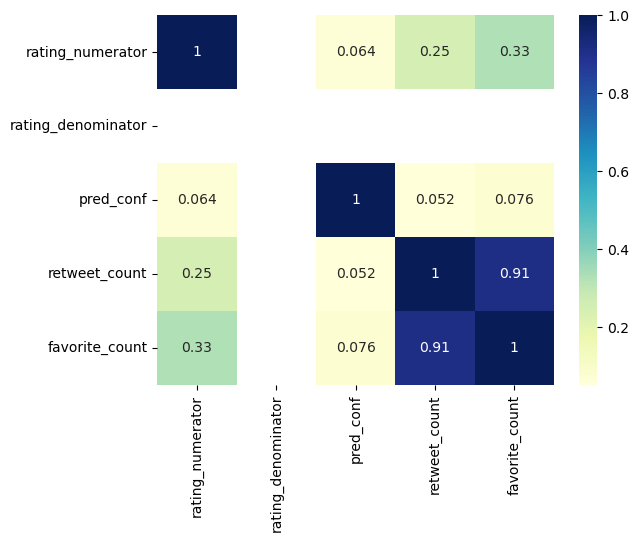

In [81]:
# view correlation heatmap
sns.heatmap(we_rate_dogs.corr(), cmap="YlGnBu", annot=True);

In [82]:
# count the number of times each dog breed was tweeted
breed_counts = we_rate_dogs["prediction"].value_counts()
breed_counts

golden_retriever      135
Labrador_retriever     91
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
clumber                 1
Name: prediction, Length: 111, dtype: int64

In [83]:
# group by dog breed, sort by rating 
ratings = we_rate_dogs.groupby("prediction")[['rating_numerator']].mean().sort_values(by='rating_numerator', ascending=False)
top_ratings = ratings.head(10).sort_values(by='rating_numerator')
top_ratings

,rating_numerator
prediction,
Eskimo_dog,11.777778
kuvasz,12.000000
standard_schnauzer,12.000000
silky_terrier,12.000000
Border_terrier,12.142857
Tibetan_mastiff,12.250000
briard,12.333333
Saluki,12.500000
Pomeranian,12.868421


In [84]:
# group by dog breed, sort by favorite count 
favorites = we_rate_dogs.groupby("prediction")[['favorite_count']].mean().sort_values(by='favorite_count', ascending=False)
top_favorites = favorites.head(10).sort_values(by='favorite_count')
top_favorites

,favorite_count
prediction,
Cardigan,15311.000000
English_springer,15657.222222
standard_poodle,15786.000000
Irish_water_spaniel,16400.000000
flat-coated_retriever,16791.625000
black-and-tan_coonhound,17012.000000
giant_schnauzer,17314.500000
Afghan_hound,17326.666667
French_bulldog,17913.000000


In [85]:
# group by dog breed, sort by retweet count 
retweets = we_rate_dogs.groupby("prediction")[['retweet_count']].mean().sort_values(by='retweet_count', ascending=False)
top_retweets = retweets.head(10).sort_values(by='retweet_count')
top_retweets

,retweet_count
prediction,
Samoyed,4623.050000
French_bulldog,4683.923077
Lakeland_terrier,4701.533333
Eskimo_dog,4768.888889
Great_Pyrenees,5017.230769
Saluki,5133.750000
giant_schnauzer,5161.500000
English_springer,5973.555556
Afghan_hound,5976.000000


### Insights:
1. The golden retriever is the most popular dog breed shared with and by WeRateDogs. Next on the list are Labrador retrievers as seen in the predictions count.


2. There is a strong correlation (0.91) between retweet count and favorite count. This would mean that most people retweet because they like the tweet. This is visible in the correlation heatmap.


3. The Saluki breed appears in the top five breeds whether we rank by rating, retweet_count or favourite_count. It also has the highest average rating. This is shown in the aggregation operations performed using the groupby() method.


4. The golden retrievers and Labrador retrievers do not make the top 10 lists for ratings, favorite counts and retweet counts even though they are the most popular dogs on the block.

### Visualization

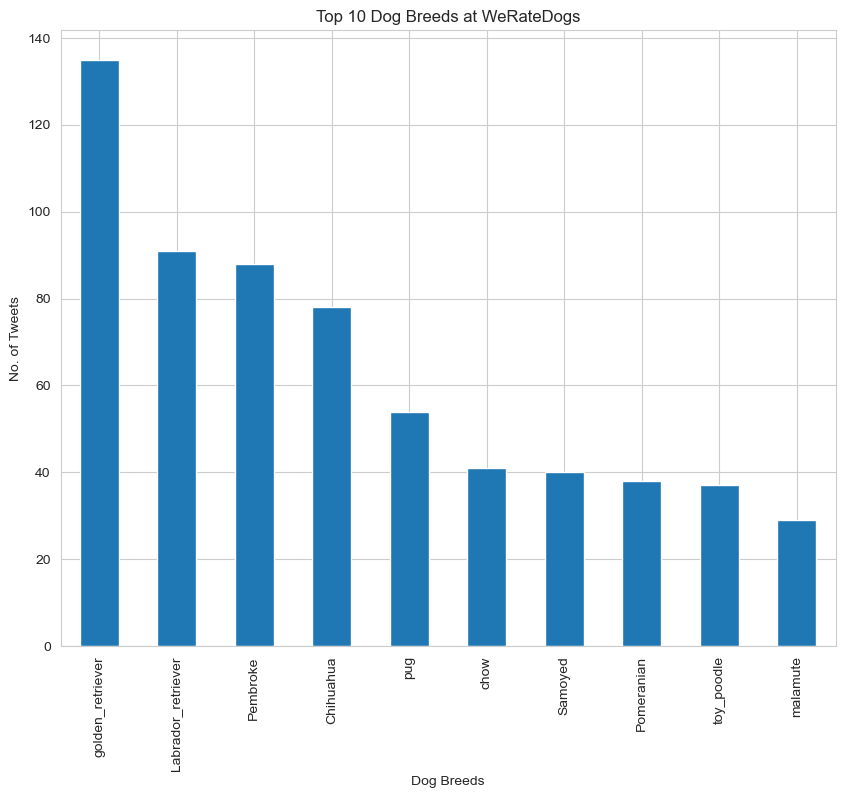

In [86]:
# visualize top 10 breeds
sns.set_style('whitegrid')
breed_counts[:10].plot(kind='bar', figsize=(10, 8))
plt.xlabel('Dog Breeds')
plt.ylabel('No. of Tweets')
plt.title('Top 10 Dog Breeds at WeRateDogs');

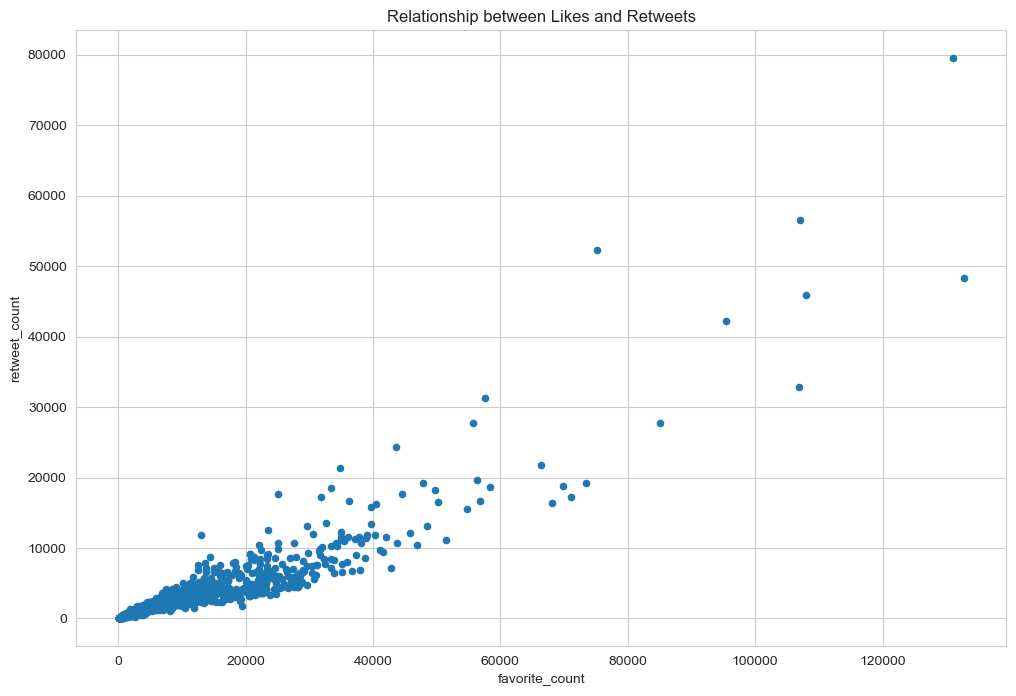

In [87]:
# visualize correlation between favorite_count and retweet_count
sns.set_style('whitegrid')
we_rate_dogs.plot(x="favorite_count", y="retweet_count", kind='scatter', figsize=(12, 8))
plt.title('Relationship between Likes and Retweets');

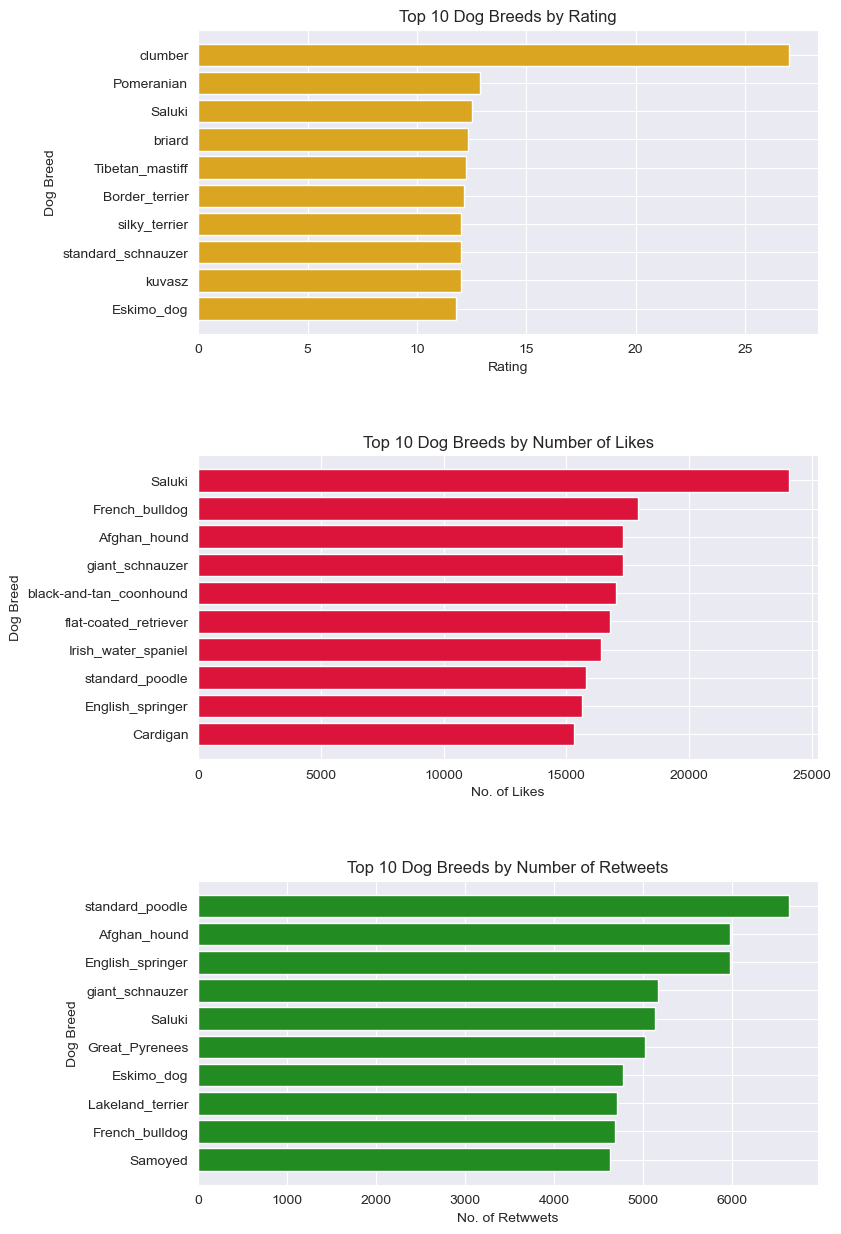

In [88]:
# visualize top 10 breeds by ratings, favorite_counts and retweet_counts
sns.set_style('darkgrid')
fig, ax = plt.subplots(3, 1,  figsize=(8, 15))
plt.subplots_adjust(hspace=0.4)

ax[0].barh(top_ratings.index, top_ratings.rating_numerator, color='goldenrod')
ax[1].barh(top_favorites.index, top_favorites.favorite_count, color='crimson')
ax[2].barh(top_retweets.index, top_retweets.retweet_count, color='forestgreen')


x_labels = ['Rating', 'No. of Likes', 'No. of Retwwets']
titles = ['Top 10 Dog Breeds by Rating', 'Top 10 Dog Breeds by Number of Likes', 'Top 10 Dog Breeds by Number of Retweets']
for i, axes in enumerate(ax):
    axes.set_xlabel(x_labels[i])
    axes.set_ylabel("Dog Breed")
    axes.set_title(titles[i])